# КЛАССИФИКАЦИЯ С ПОМОЩЬЮ ПЕРСЕПТРОНА


Цель работы: изучение модели нейрона персептрона и архитектуры персептронной однослойной нейронной сети; создание
и исследование моделей персептронных нейронных сетей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler

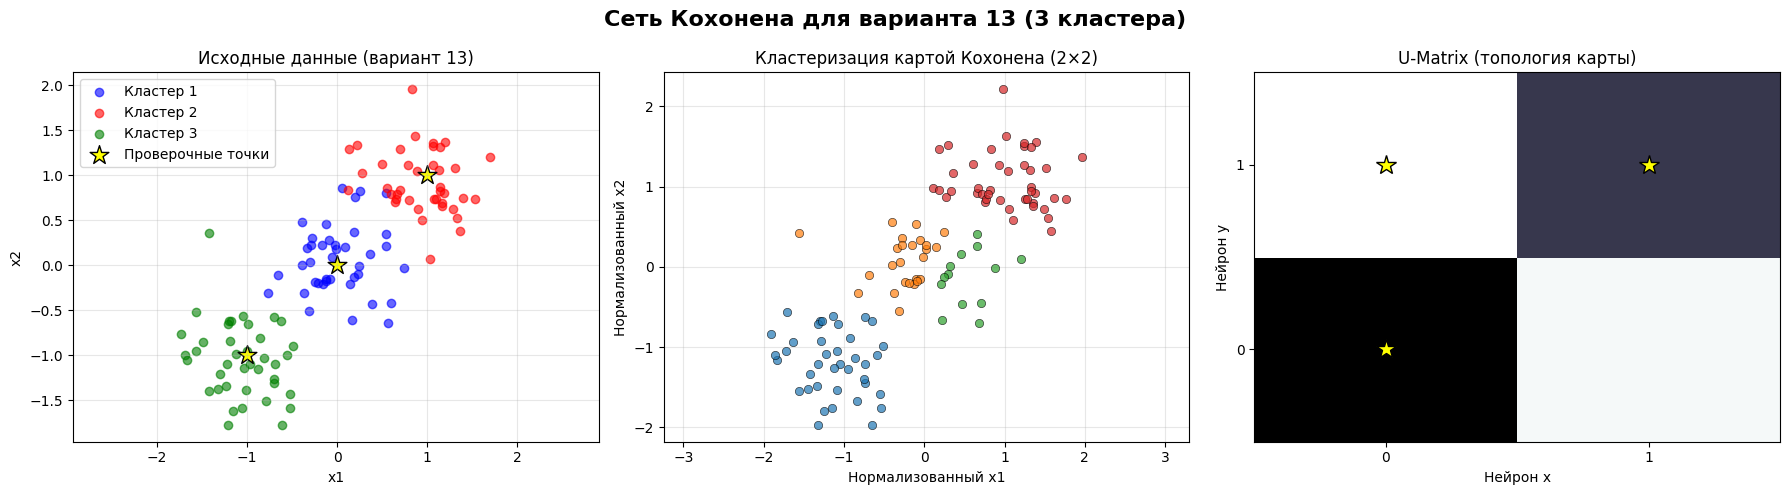

Классификация проверочных точек сетью Кохонена (вариант 13):
Точка [0 0] → нейрон-победитель (0, 1)
Точка [1 1] → нейрон-победитель (1, 1)
Точка [-1 -1] → нейрон-победитель (0, 0)


In [2]:
np.random.seed(13)

# Кластер 1: вокруг точки (0, 0)
cluster1 = np.random.randn(40, 2) * 0.4 + np.array([0, 0])
# Кластер 2: вокруг точки (1, 1)
cluster2 = np.random.randn(40, 2) * 0.4 + np.array([1, 1])
# Кластер 3: вокруг точки (-1, -1)
cluster3 = np.random.randn(40, 2) * 0.4 + np.array([-1, -1])

# Объединение данных
X = np.vstack([cluster1, cluster2, cluster3])

# Нормализация данных (важно для корректной работы SOM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создание карты Кохонена 2x2 (достаточно для 3 кластеров)
som = MiniSom(2, 2, 2, sigma=1.0, learning_rate=0.5, random_seed=42)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)

# Визуализация результатов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Исходные данные
axes[0].scatter(cluster1[:, 0], cluster1[:, 1], c='blue', label='Кластер 1', alpha=0.6)
axes[0].scatter(cluster2[:, 0], cluster2[:, 1], c='red', label='Кластер 2', alpha=0.6)
axes[0].scatter(cluster3[:, 0], cluster3[:, 1], c='green', label='Кластер 3', alpha=0.6)
axes[0].scatter([0, 1, -1], [0, 1, -1], c='yellow', edgecolors='black', 
                s=200, marker='*', label='Проверочные точки')
axes[0].set_title('Исходные данные (вариант 13)')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].axis('equal')

# 2. Результаты кластеризации SOM
axes[1].set_title('Кластеризация картой Кохонена (2×2)')
for i, x in enumerate(X_scaled):
    w = som.winner(x)
    # Определение цвета по позиции нейрона-победителя
    color_idx = w[0] * 2 + w[1]
    axes[1].plot(x[0], x[1], 'o', 
                 markerfacecolor=plt.cm.tab10(color_idx / 10),
                 markeredgecolor='k', 
                 markersize=6, 
                 markeredgewidth=0.5,
                 alpha=0.7)
axes[1].set_xlabel('Нормализованный x1')
axes[1].set_ylabel('Нормализованный x2')
axes[1].grid(True, alpha=0.3)
axes[1].axis('equal')

# 3. U-Matrix (матрица расстояний между соседними нейронами)
axes[2].set_title('U-Matrix (топология карты)')
umatrix = som.distance_map()
axes[2].pcolor(umatrix.T, cmap='bone_r')
axes[2].set_xticks(np.arange(2) + 0.5)
axes[2].set_yticks(np.arange(2) + 0.5)
axes[2].set_xticklabels(['0', '1'])
axes[2].set_yticklabels(['0', '1'])
axes[2].set_xlabel('Нейрон x')
axes[2].set_ylabel('Нейрон y')

# Добавление маркеров для проверочных точек на U-Matrix
test_points = np.array([[0, 0], [1, 1], [-1, -1]])
test_scaled = scaler.transform(test_points)
for pt, pt_scaled in zip(test_points, test_scaled):
    winner = som.winner(pt_scaled)
    axes[2].plot(winner[0] + 0.5, winner[1] + 0.5, '*', 
                 markersize=15, color='yellow', markeredgecolor='black')

plt.suptitle('Сеть Кохонена для варианта 13 (3 кластера)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Классификация проверочных точек
print("Классификация проверочных точек сетью Кохонена (вариант 13):")
test_points = np.array([[0, 0], [1, 1], [-1, -1]])
test_scaled = scaler.transform(test_points)

for pt, pt_scaled in zip(test_points, test_scaled):
    winner = som.winner(pt_scaled)
    print(f"Точка {pt} → нейрон-победитель ({winner[0]}, {winner[1]})")